In [1]:
import numpy as np
import pandas as pd
import os
import utils
import gmm
from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture

In [2]:
curr_dir = os.getcwd()
data_path = curr_dir + '/../data/'
fig_path = curr_dir + '/../figs/'

In [3]:
park_data, gps_loc, N = utils.load_daily_data(data_path)
results = gmm.locational_demand_analysis(park_data, gps_loc, N)

In [30]:
errors = [result[:-1] for result in results]

In [35]:
errors

[(0, 8, 0.60014204545454541),
 (0, 9, 0.79865056818181823),
 (0, 10, 0.89263731060606055),
 (0, 11, 0.92986505681818177),
 (0, 12, 0.93865411931818199),
 (0, 13, 0.92663944128787878),
 (0, 14, 0.88790246212121204),
 (0, 15, 0.86186079545454541),
 (0, 16, 0.85135535037878773),
 (0, 17, 0.84179687500000011),
 (1, 8, 0.5889423076923076),
 (1, 9, 0.79041466346153832),
 (1, 10, 0.90238667582417587),
 (1, 11, 0.927949004120879),
 (1, 12, 0.93591174450549441),
 (1, 13, 0.94773780906593408),
 (1, 14, 0.92196085164835151),
 (1, 15, 0.88719093406593397),
 (1, 16, 0.88444368131868145),
 (1, 17, 0.84673334478021978),
 (2, 8, 0.62682434752747251),
 (2, 9, 0.7922604739010991),
 (2, 10, 0.90547733516483508),
 (2, 11, 0.92301253434065944),
 (2, 12, 0.94372424450549441),
 (2, 13, 0.955292754120879),
 (2, 14, 0.95668784340659341),
 (2, 15, 0.90245106456043966),
 (2, 16, 0.8980940934065933),
 (2, 17, 0.89611950549450547),
 (3, 8, 0.62712482829670324),
 (3, 9, 0.74645861950549453),
 (3, 10, 0.898823832417

In [48]:
((1 - np.array(errors)[:,2].reshape((6,10)))*100).mean(axis=1)

array([ 14.70495975,  13.66328984,  12.00055804,  13.76223386,
        12.80561756,  17.02306548])

In [40]:
(1 - np.array(errors)[:,2].reshape((6,10))[2]) * 100

array([ 37.31756525,  20.77395261,   9.45226648,   7.69874657,
         5.62757555,   4.47072459,   4.33121566,   9.75489354,
        10.19059066,  10.38804945])

In [41]:
(1 - np.array(errors)[:,2].reshape((6,10))[3]) * 100

array([ 37.28751717,  25.35413805,  10.11761676,   7.27807349,
         6.96471497,   6.12336882,   7.32099931,  12.30683379,
        11.98918269,  12.87989354])

In [42]:
(1 - np.array(errors)[:,2].reshape((6,10))[4]) * 100

array([ 34.09040179,  22.17447917,  10.97470238,   6.34300595,
         5.77938988,   7.07217262,   5.79427083,   9.73772321,
        12.81436012,  13.27566964])

In [43]:
(1 - np.array(errors)[:,2].reshape((6,10))[5]) * 100

array([ 42.34933036,  32.86830357,  17.05915179,  12.26376488,
        12.01450893,  10.63988095,  12.13727679,  11.52901786,
         9.79352679,   9.57589286])

In [5]:
means = [result[-1] for result in results]

In [7]:
import matplotlib.pyplot as plt

In [ ]:
default_means 

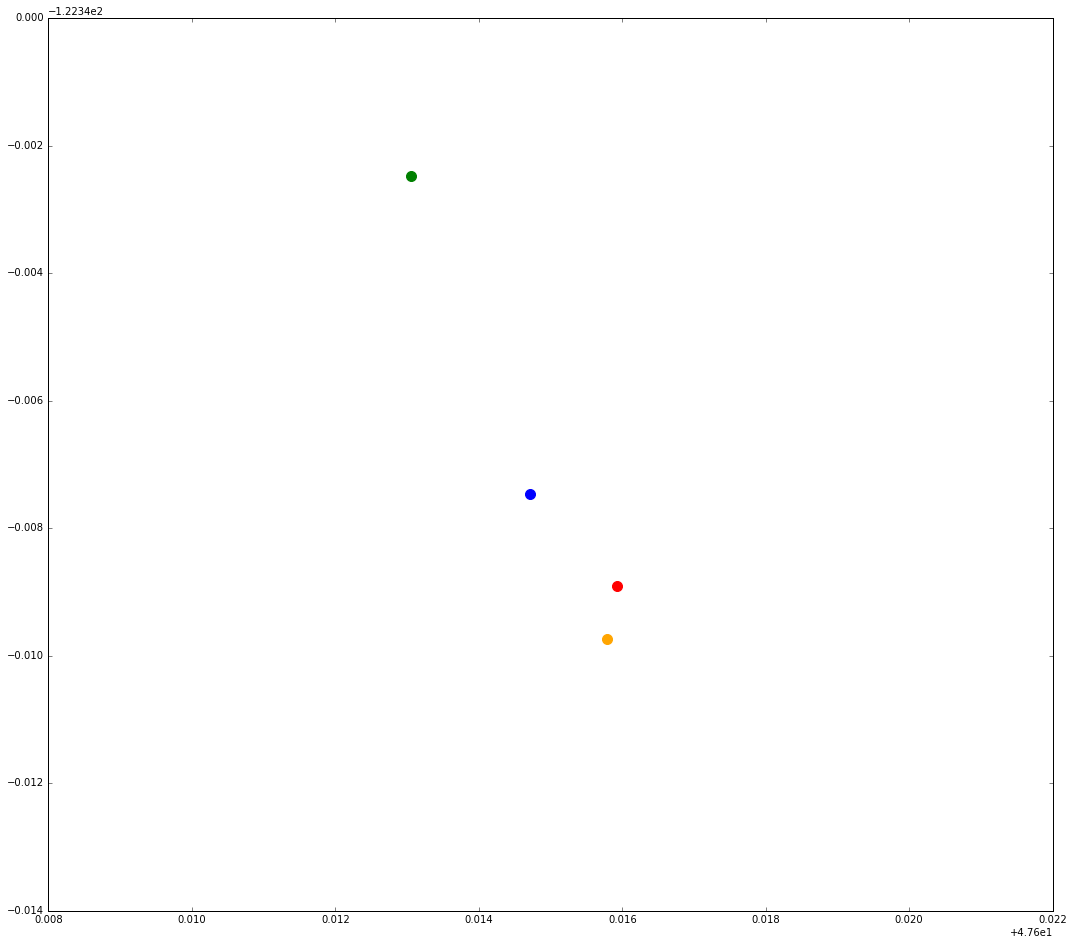

In [26]:
plt.figure(figsize=(18,16))
i = 0
for fit in means[0]:
    plt.scatter(fit[0,0], fit[0,1], color='blue', s=100)
    plt.scatter(fit[1,0], fit[1,1], color='red', s=100)
    plt.scatter(fit[2,0], fit[2,1], color='green', s=100)
    plt.scatter(fit[3,0], fit[3,1], color='orange', s=100)
    break
    i += 1
plt.show()

0
1


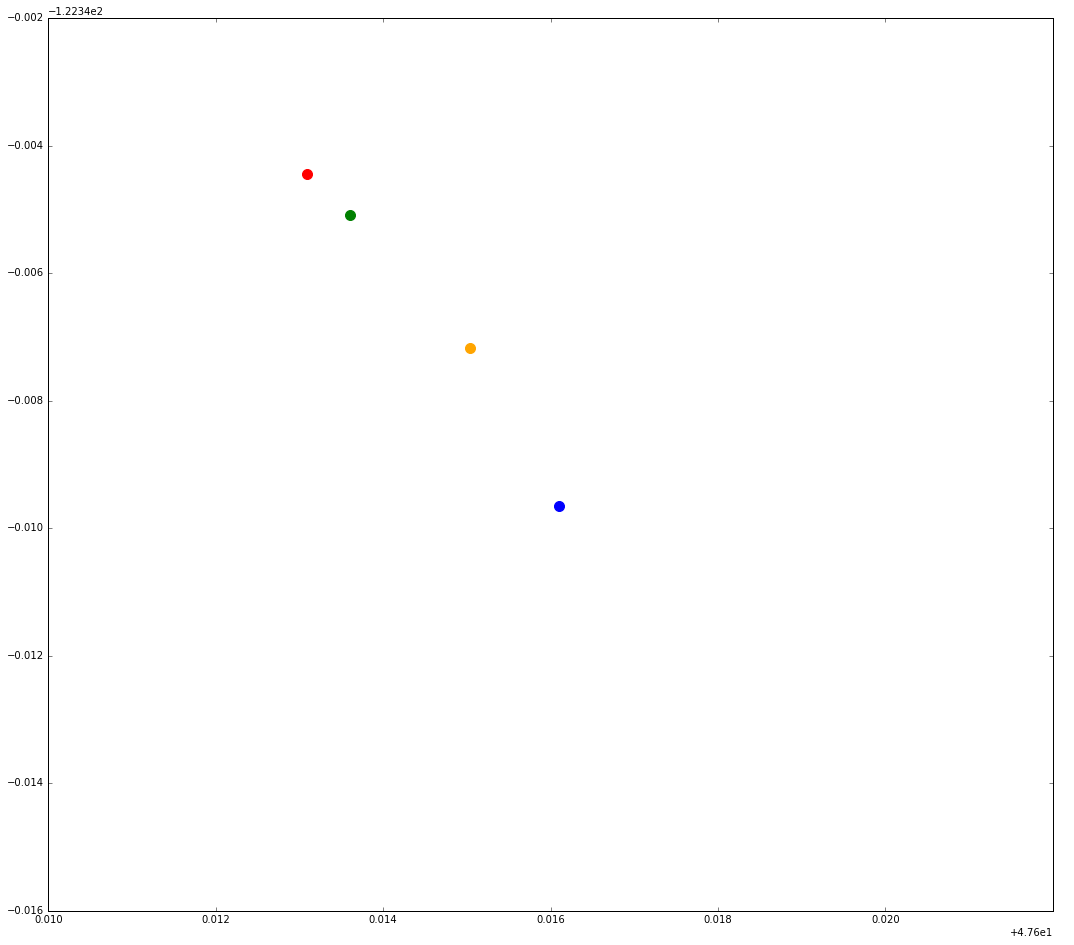

0
2


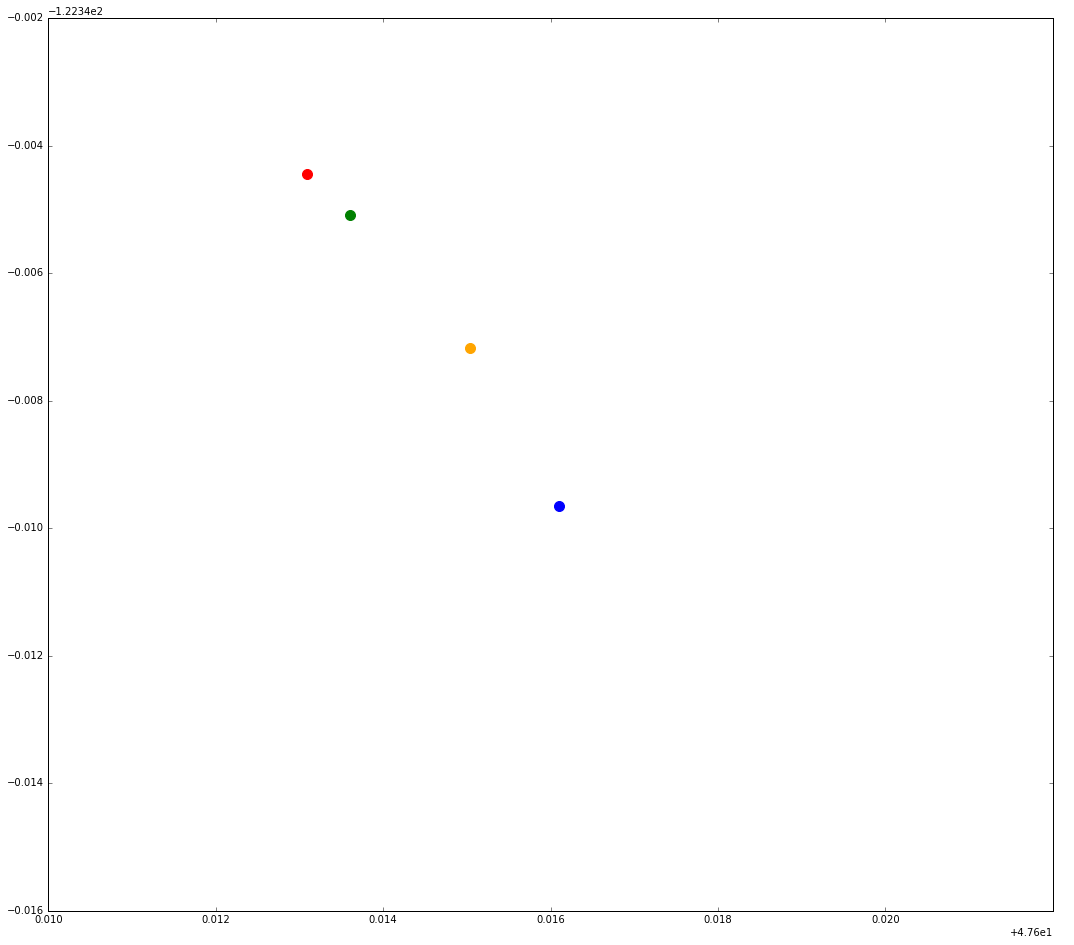

0
3


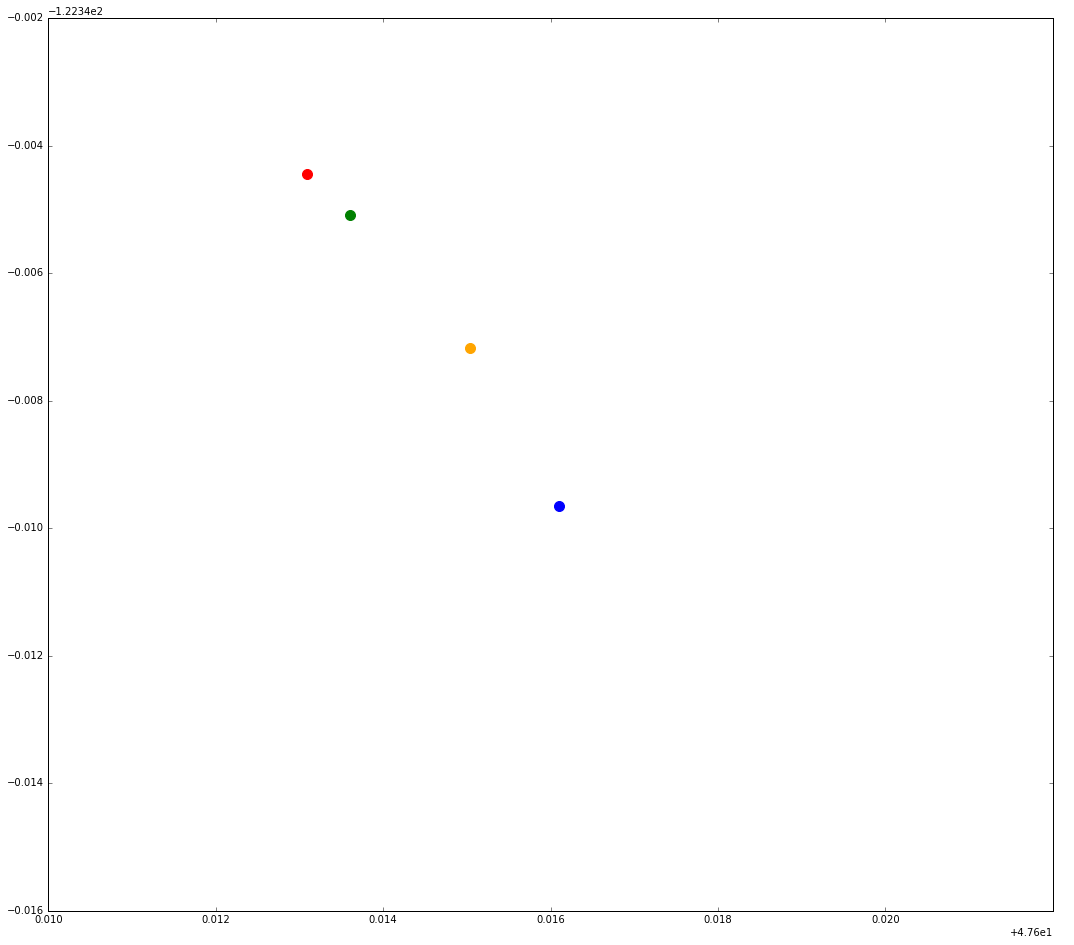

0
4


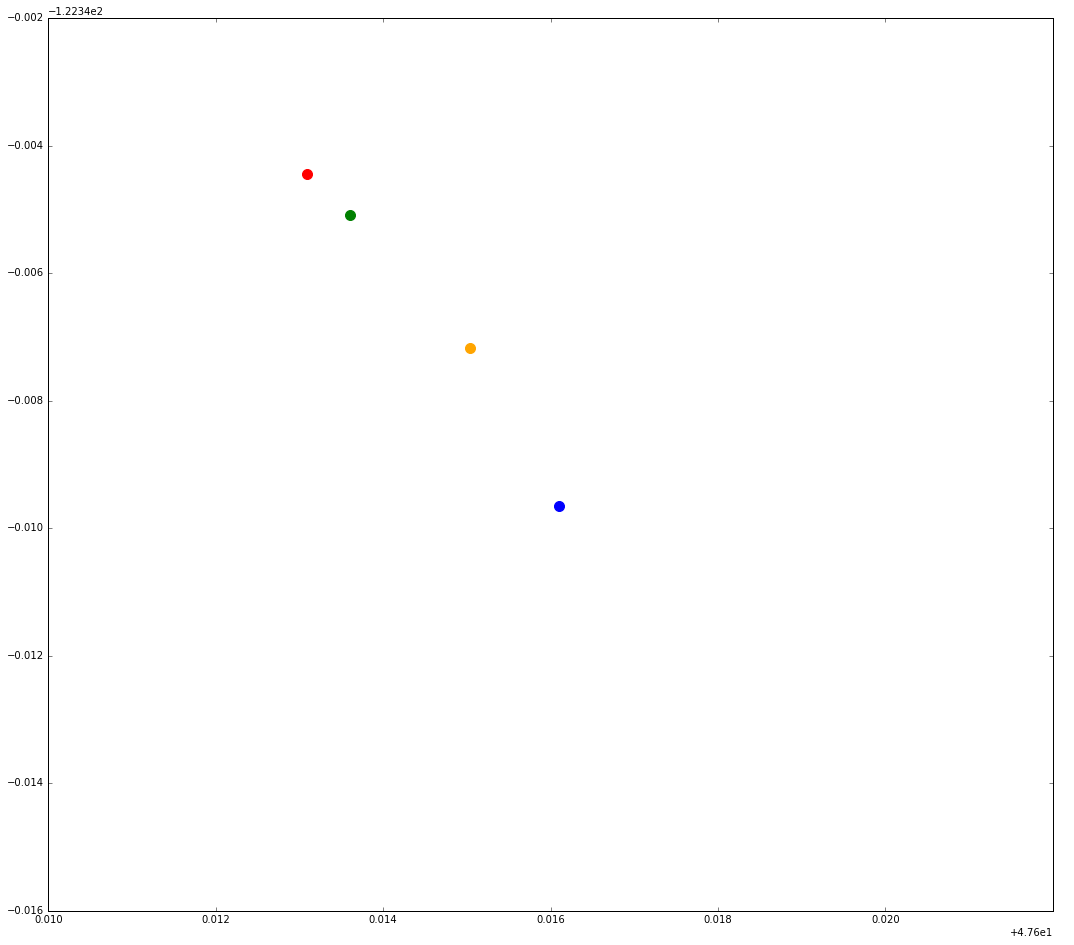

0
5


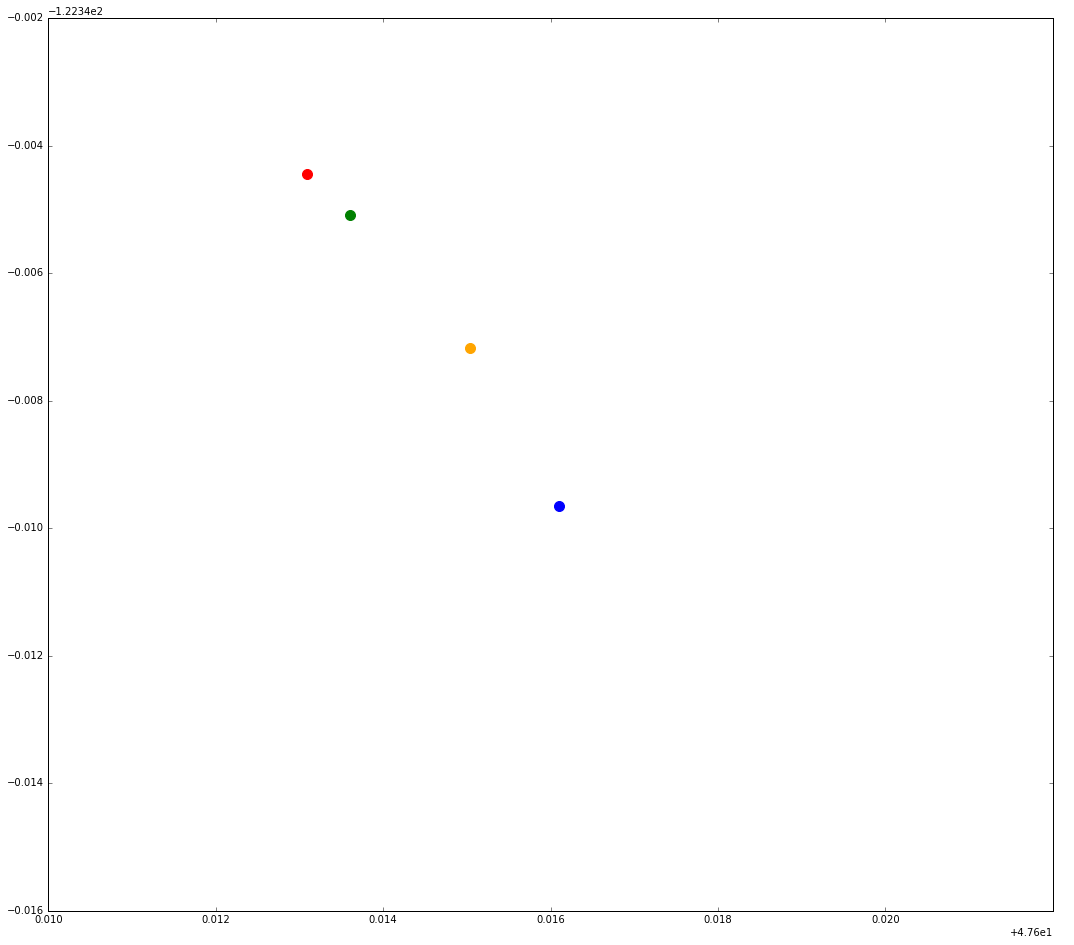

0
6


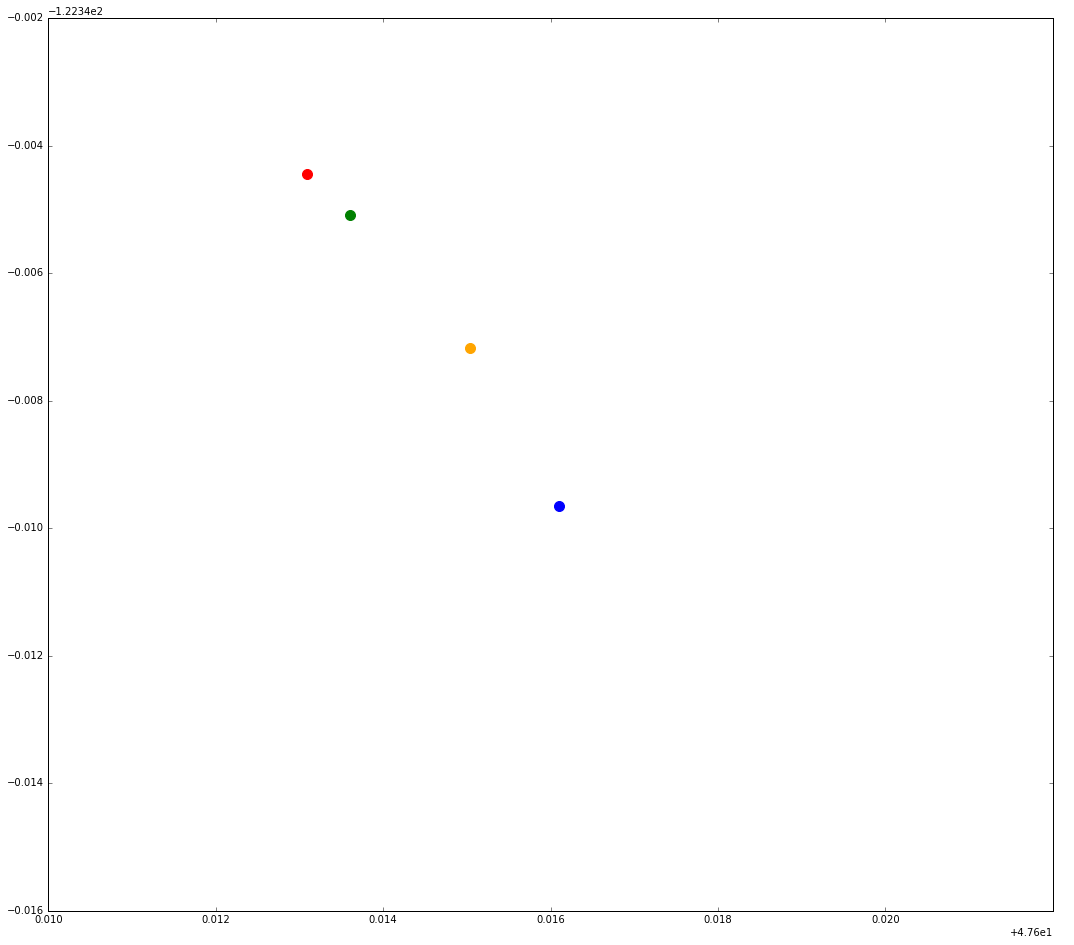

0
7


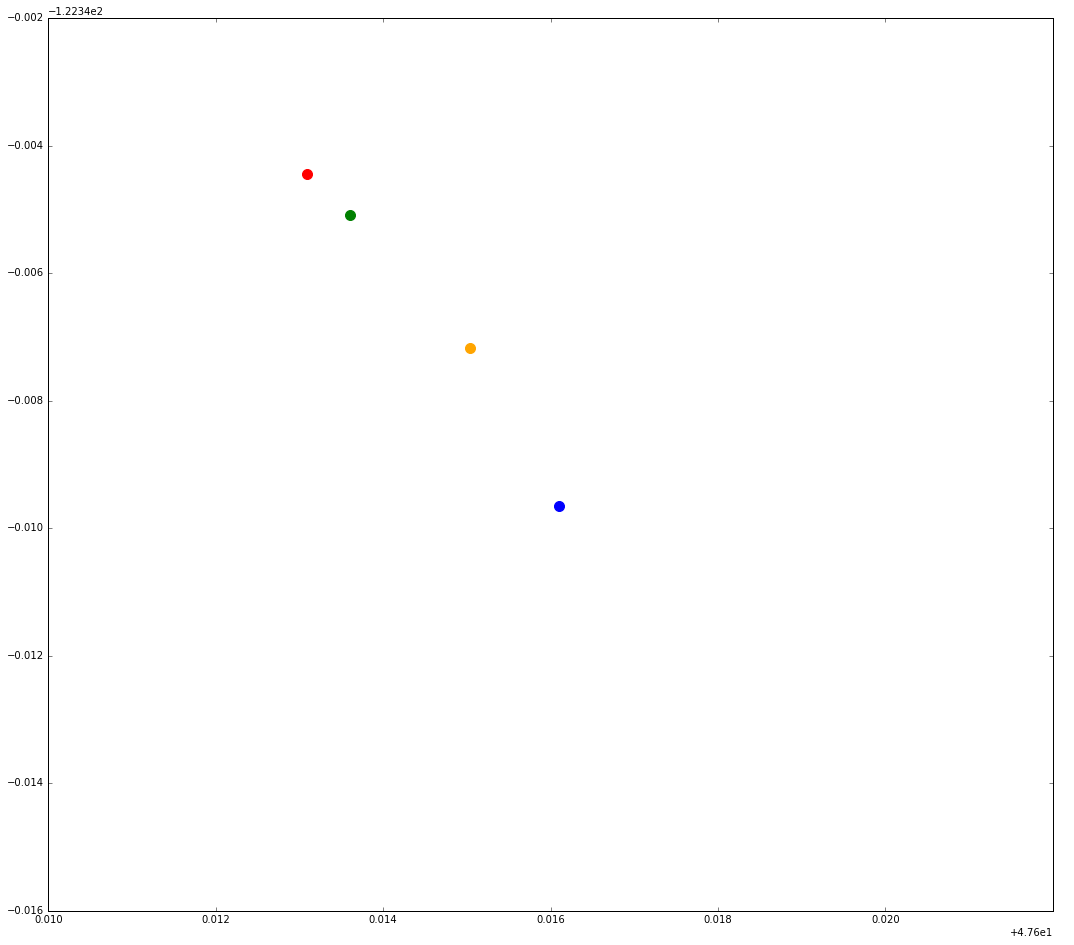

0
8


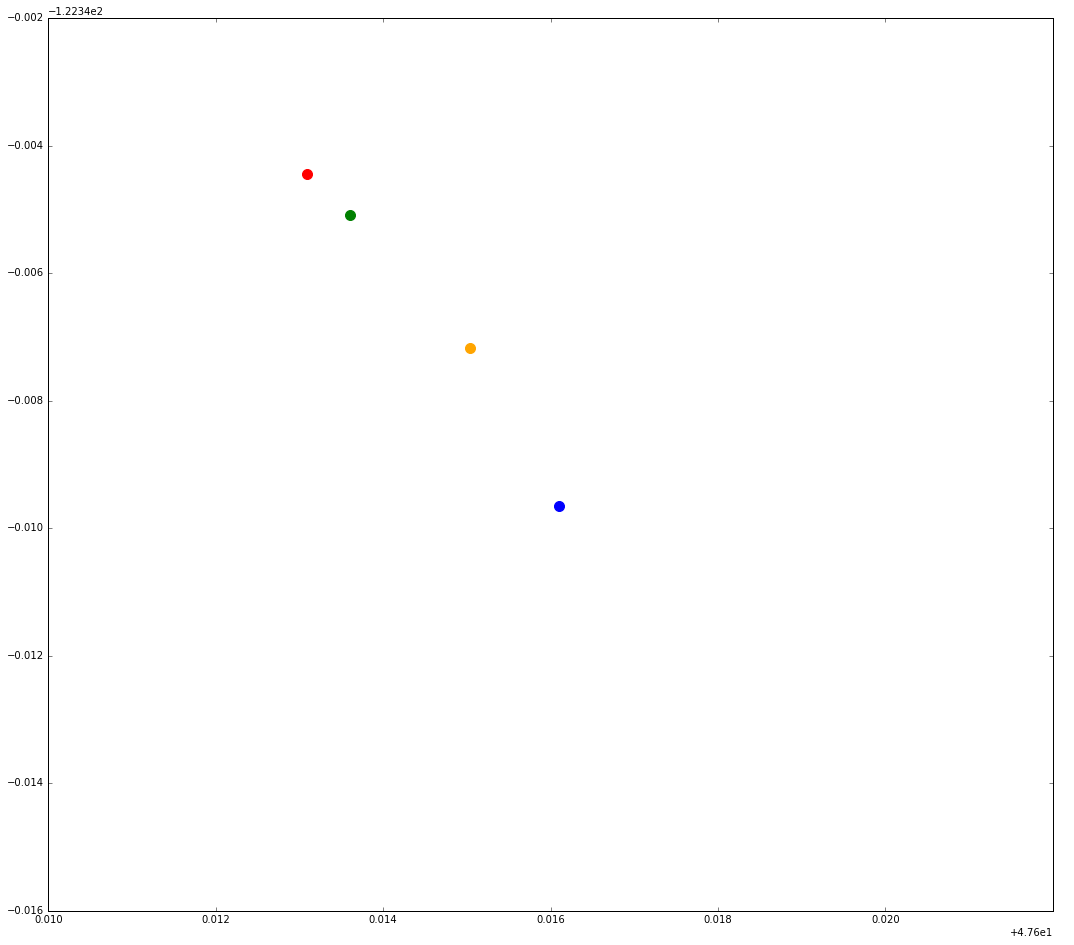

0
9


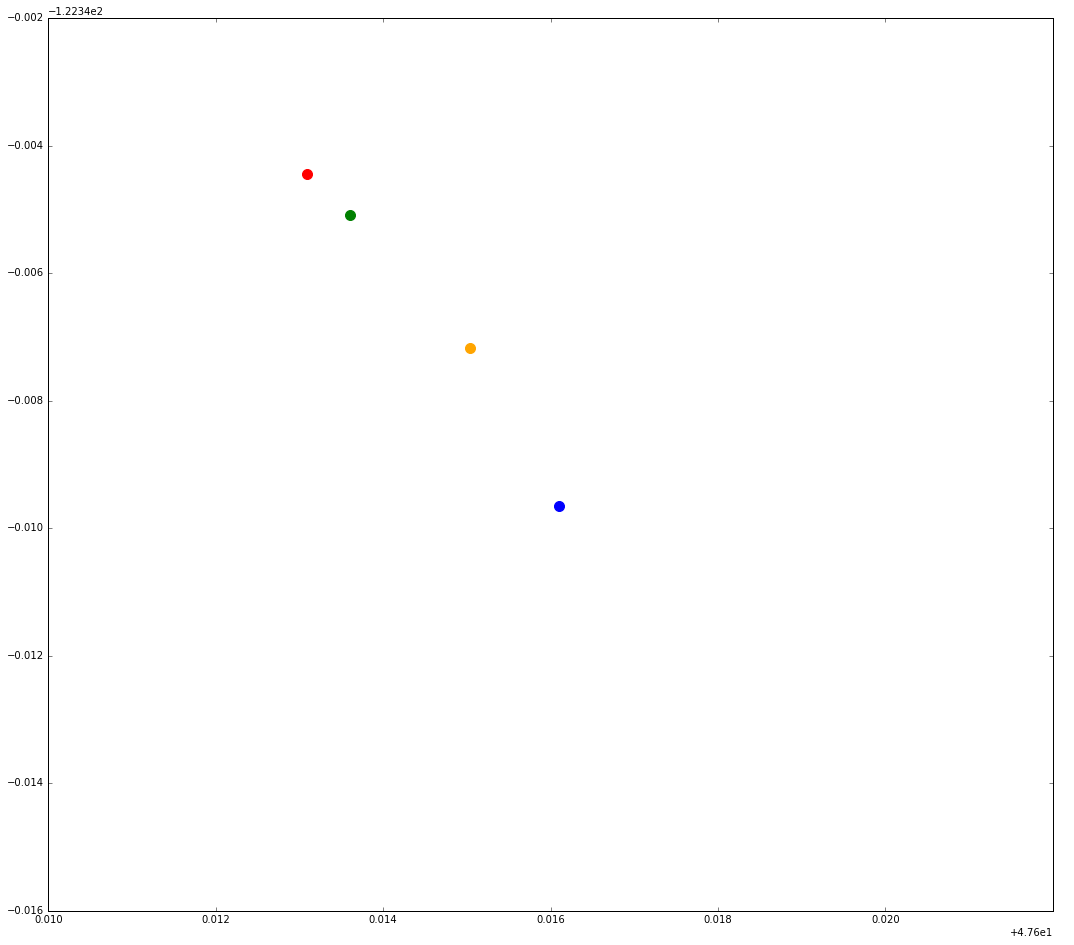

In [28]:
for j in range(1,10):
    plt.figure(figsize=(18,16))
    i = 0
    for fit in means[0]:
        print i
        if i != j:
            i += j
            continue
        plt.scatter(fit[0,0], fit[0,1], color='blue', s=100)
        plt.scatter(fit[1,0], fit[1,1], color='red', s=100)
        plt.scatter(fit[2,0], fit[2,1], color='green', s=100)
        plt.scatter(fit[3,0], fit[3,1], color='orange', s=100)

        if i == j:
            break
        i += 1
    plt.show()

In [ ]:
curr_dir

In [ ]:
all_stuff = []

for day in park_data['Day'].unique():
    for hour in park_data['Hour'].unique():

        data_df = park_data.loc[(park_data['Day'] == day) & (park_data['Hour'] == hour)]

        # Each row is an element key, and each column is a date.
        data = data_df['Load'].values.reshape((-1, N)).T

        P = data.shape[1]

        average_accuracies = []

        for train_time in range(P):
            num_comps = 4

            train = np.hstack((data[:, train_time, None], gps_loc))

            scaler = MinMaxScaler().fit(train)
            train = scaler.transform(train)

            gmm = mixture.GaussianMixture(n_init=200, n_components=num_comps, 
                                          covariance_type='diag').fit(train)

            # Scaling the mean and covariances back to gps coordinates.
            means = np.vstack(([(mean[1:] - scaler.min_[1:])/(scaler.scale_[1:]) for mean in gmm.means_]))
            covs = np.dstack(([np.diag((cov[1:])/(scaler.scale_[1:]**2)) for cov in gmm.covariances_])).T

            train_labels = gmm.predict(train)

            accuracies = []

            for test_time in range(P):
                if test_time == train_time:
                    continue

                test = np.hstack((data[:, test_time, None], gps_loc))

                test = scaler.transform(test)

                test_labels = gmm.predict(test)

                correct_idx = [i for i in range(N) if train_labels[i] == test_labels[i]]
                accuracy = len(correct_idx)/float(N)

                accuracies.append(accuracy)

            average_accuracies.append(np.array(accuracies).mean())

        avg = np.array(average_accuracies).mean()
        
        print day, hour, avg
        
        all_stuff.append((day, hour, avg))

In [ ]:
all_error = [stuff[2] for stuff in all_stuff if stuff[1] != 8 and stuff[1] != 9] 

In [ ]:
np.array(all_error).mean()

In [ ]:
park_data['Hour'].unique()

In [ ]:
accuracy = len(matching)/float(N) 

In [ ]:
accuracy